# Requirements

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig('E:\Guvi-MDS\DT5\capstone_projects\final projects\images\end_to_end_project', format=fig_extension, dpi=resolution)

#### Library

In [1]:
! pip install xgboost

     -------------------------------------- 99.7/99.7 MB 408.1 kB/s eta 0:00:00
     ---------------------------------------- 44.1/44.1 MB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
!pip install sweetviz

In [2]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle
import shap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import LeaveOneOutEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sweetviz as sv
import xgboost
from xgboost import XGBRegressor


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


#### Get the Data

In [3]:
train = pd.read_csv("E:/Guvi-MDS/DT5/capstone_projects/final projects/train-2.csv")

In [4]:
train.head(1)

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93


In [10]:
print(train.dtypes)

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object


#### Data Types

In [5]:
import pandas as pd


# Define data types for columns
data_types = {
    'Flight_ID': 'object',
    'Airline': 'category',
    'Departure_City': 'object',
    'Arrival_City': 'object',
    'Distance': 'float64',
    'Departure_Time': 'datetime64[ns]',
    'Arrival_Time': 'datetime64[ns]',
    'Duration': 'float64',
    'Aircraft_Type': 'category',
    'Number_of_Stops': 'int64',
    'Day_of_Week': 'category',
    'Month_of_Travel': 'category',
    'Holiday_Season': 'category',
    'Demand': 'category',
    'Weather_Conditions': 'category',
    'Passenger_Count': 'int64',
    'Promotion_Type': 'category',
    'Fuel_Price': 'float64',
    'Flight_Price': 'float64'
}

# Apply data types to DataFrame columns
train = train.astype(data_types)

# Print the data types of the DataFrame columns
print(train.dtypes)

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Flight_ID                     object
Airline                     category
Departure_City                object
Arrival_City                  object
Distance                     float64
Departure_Time        datetime64[ns]
Arrival_Time          datetime64[ns]
Duration                     float64
Aircraft_Type               category
Number_of_Stops                int64
Day_of_Week                 category
Month_of_Travel             category
Holiday_Season              category
Demand                      category
Weather_Conditions          category
Passenger_Count                int64
Promotion_Type              category
Fuel_Price                   float64
Flight_Price                 float64
dtype: object


#### Take a Quick Look at the Data Structure

In [6]:
train.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,2023-11-09 08:23:00,2023-11-09 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-09 20:28:00,2023-11-09 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-09 11:30:00,2023-11-09 15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,2023-11-09 20:24:00,2023-11-09 01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-09 21:59:00,2023-11-09 06:04:00,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Flight_ID           45000 non-null  object        
 1   Airline             41427 non-null  category      
 2   Departure_City      44660 non-null  object        
 3   Arrival_City        44814 non-null  object        
 4   Distance            44909 non-null  float64       
 5   Departure_Time      45000 non-null  datetime64[ns]
 6   Arrival_Time        45000 non-null  datetime64[ns]
 7   Duration            45000 non-null  float64       
 8   Aircraft_Type       44957 non-null  category      
 9   Number_of_Stops     45000 non-null  int64         
 10  Day_of_Week         44775 non-null  category      
 11  Month_of_Travel     44733 non-null  category      
 12  Holiday_Season      35980 non-null  category      
 13  Demand              44683 non-null  category  

In [8]:
data = train.copy() # Copied data from the train

In [9]:
data.shape

(45000, 19)

In [10]:
# check for all the columns present
column_names = np.array(data.columns)
print(column_names)

['Flight_ID' 'Airline' 'Departure_City' 'Arrival_City' 'Distance'
 'Departure_Time' 'Arrival_Time' 'Duration' 'Aircraft_Type'
 'Number_of_Stops' 'Day_of_Week' 'Month_of_Travel' 'Holiday_Season'
 'Demand' 'Weather_Conditions' 'Passenger_Count' 'Promotion_Type'
 'Fuel_Price' 'Flight_Price']


#### EDA

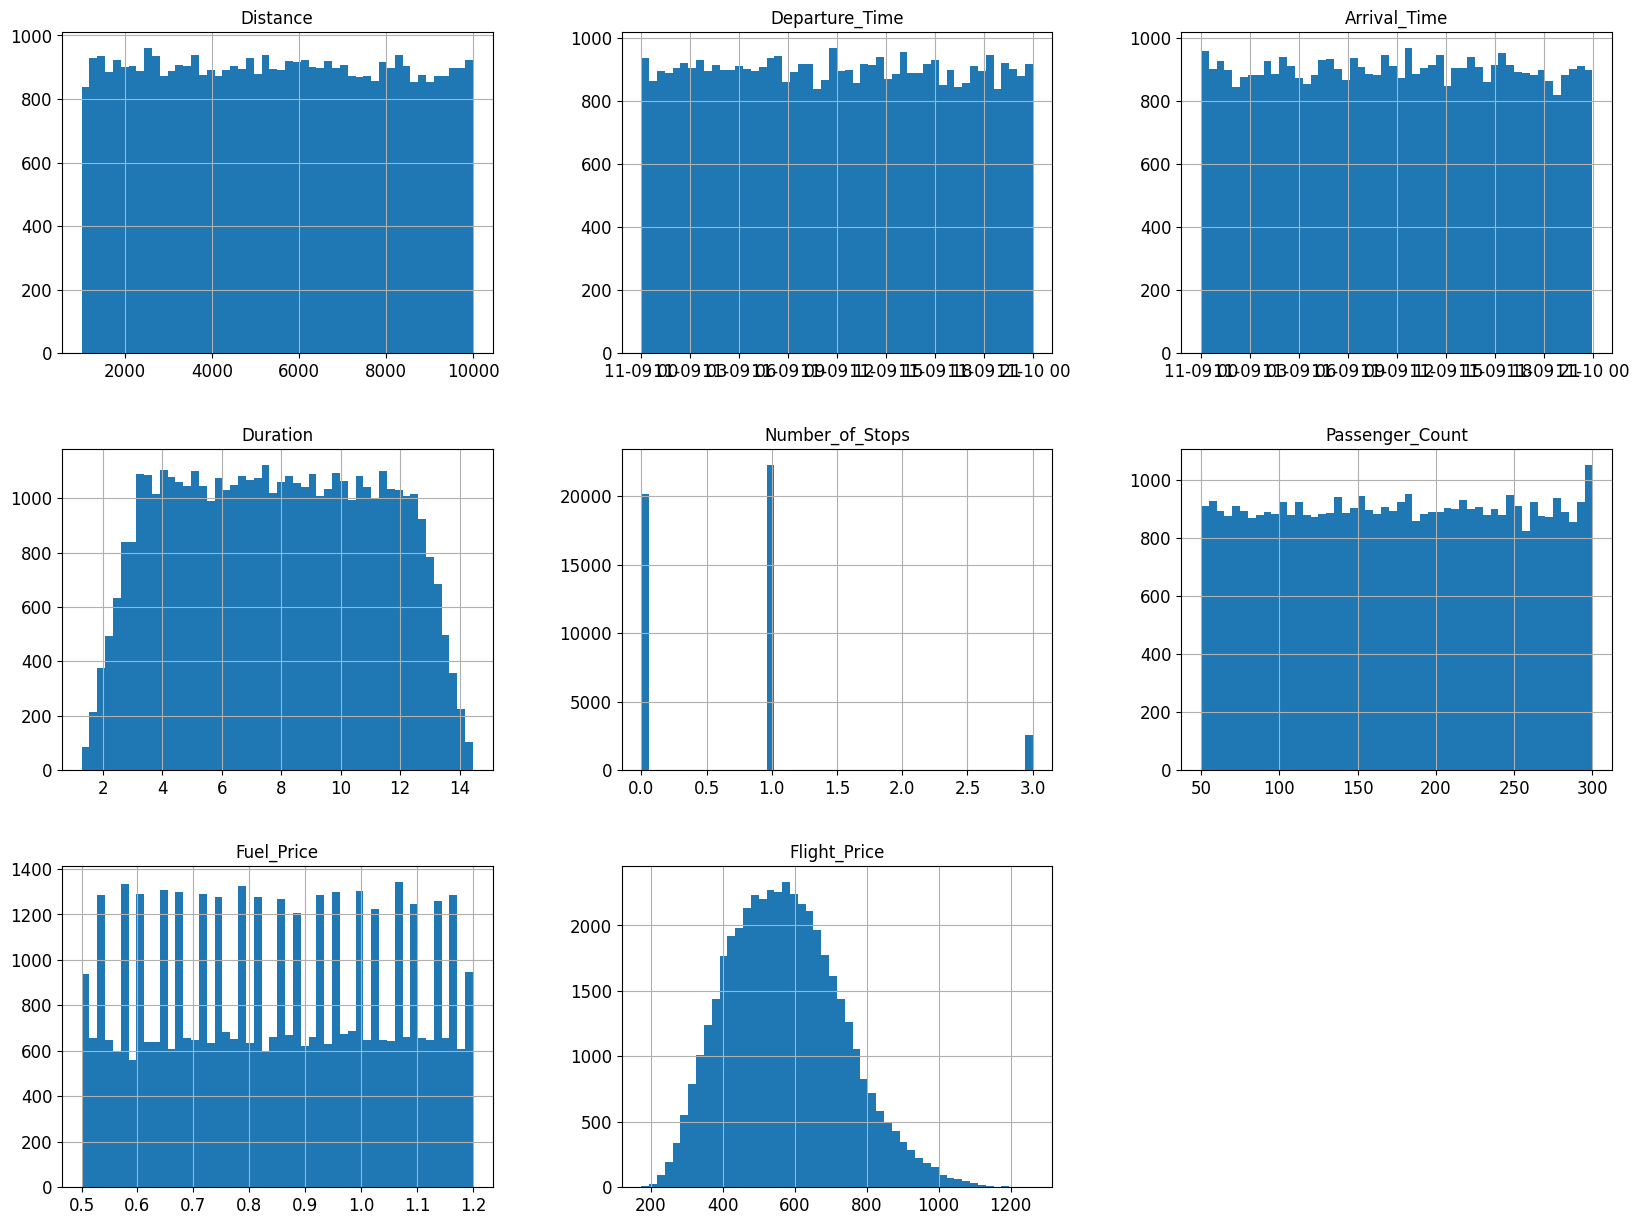

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Promotion_Type,33.811111
Holiday_Season,20.044444
Airline,7.940000
Departure_City,0.755556
Demand,0.704444
Weather_Conditions,0.671111
Month_of_Travel,0.593333
Day_of_Week,0.500000
Arrival_City,0.413333
Distance,0.202222


In [13]:
data.isnull().sum() 

Flight_ID                 0
Airline                3573
Departure_City          340
Arrival_City            186
Distance                 91
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Holiday_Season         9020
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price               90
Flight_Price              0
dtype: int64

In [32]:
describe_result = data.describe(percentiles=[.05,.15,.25, .5, .75, .95, 0.99, 1])

describe_result

,Distance,Departure_Time,Arrival_Time,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44909.000000,45000,45000,45000.000000,45000.000000,45000.000000,44910.000000,45000.000000
mean,5482.238727,2023-11-07 11:57:51.866666752,2023-11-07 11:57:59.582666496,7.852555,0.665667,174.928822,0.850192,574.606270
min,1000.000000,2023-11-07 00:00:00,2023-11-07 00:00:00,1.280000,0.000000,50.000000,0.500000,173.350000
5%,1450.000000,2023-11-07 01:12:00,2023-11-07 01:09:57,2.740000,0.000000,62.000000,0.540000,332.260000
15%,2344.000000,2023-11-07 03:36:00,2023-11-07 03:36:00,3.940000,0.000000,87.000000,0.610000,404.374000
25%,3230.000000,2023-11-07 05:58:00,2023-11-07 05:59:45,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5476.000000,2023-11-07 11:57:00,2023-11-07 11:58:00,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7725.000000,2023-11-07 17:54:00,2023-11-07 17:56:00,10.650000,1.000000,238.000000,1.020000,679.692500
95%,9554.600000,2023-11-07 22:46:00,2023-11-07 22:47:00,13.000000,3.000000,288.000000,1.160000,857.502500
99%,9909.000000,2023-11-07 23:45:00,2023-11-07 23:44:00,13.810000,3.000000,298.000000,1.190000,989.130000


#### Create Train and Validation dataset

In [17]:
flight_price_ranges = [0., 455, 565, 679, 1267, np.inf]
flight_price_labels = [1, 2, 3, 4, 5]

data["Flight_Price_Bin"] = pd.cut(data["Flight_Price"],
                                  bins=flight_price_ranges,
                                  labels=flight_price_labels)

In [34]:
data

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Flight_Price_Bin
0,F1,Airline B,NaN,Greenshire,8286.0,2023-11-07 08:23:00,2023-11-07 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93,3
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-07 20:28:00,2023-11-07 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13,1
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-07 11:30:00,2023-11-07 15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17,1
3,F4,NaN,Blakefort,Crosbyberg,3145.0,2023-11-07 20:24:00,2023-11-07 01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42,1
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-07 21:59:00,2023-11-07 06:04:00,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,2023-11-07 21:49:00,2023-11-07 03:31:00,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18,1
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,2023-11-07 22:50:00,2023-11-07 11:48:00,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03,4
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2023-11-07 02:33:00,2023-11-07 11:21:00,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39,2
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,2023-11-07 13:25:00,2023-11-07 19:37:00,6.21,Boeing 737,0,Saturday,June,NaN,Medium,Cloudy,121,Special Offer,0.60,487.67,2


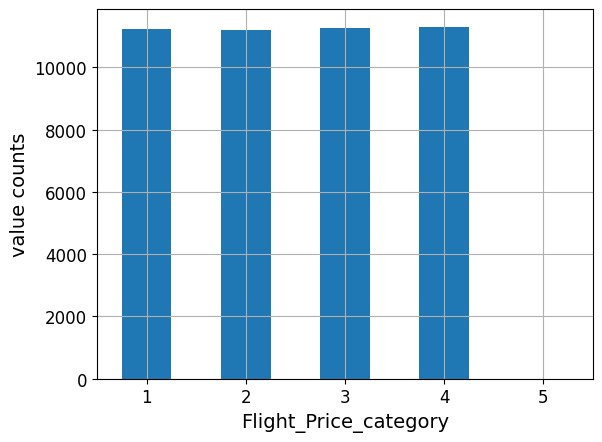

In [18]:
data["Flight_Price_Bin"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Flight_Price_category")
plt.ylabel("value counts")
plt.show()

In [42]:
# strat_train_set, strat_test_set = train_test_split(
#    data, test_size=0.2, stratify=data["Flight_Price_Bin"], random_state=42)

In [43]:
# strat_test_set["Flight_Price_Bin"].value_counts() / len(strat_test_set)

Flight_Price_Bin
4    0.251222
3    0.250444
1    0.249556
2    0.248778
5    0.000000
Name: count, dtype: float64

Corelation

In [44]:
corr_matrix = strat_train_set.corr()

ValueError: could not convert string to float: 'Airline B'

In [76]:
#corr_matrix["Flight_Price"].sort_values(ascending=False)

#### Data Vizualization

###### Sweet_Viz

In [45]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

Feature: Flight_ID                           |█▉                                       | [  5%]   00:00 -> (00:01 left)is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
Feature: Airline                             |███▉                                     | [ 10%]   00:00 -> (00:04 left)is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
Feature: Departure_City                      |█████▊                                   | [ 14%]   00:00 -> (00:04 left)is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
Feature: Arrival_City                        |███████▊                                 | [ 19%]   00:00 -> (00:03 left)is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
Feature: Departure_Time     

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###### Bar vs Line Graphs

#### Feature Engineering

In [47]:
# Pricing["Flight_Cost"] = Pricing["Fuel_Price"] * Pricing["Distance"]
# Pricing["Flight_Income"] = Pricing["Passenger_Count"] * Pricing["Flight_Price"]
# Pricing["Flight_Profit"] = Pricing["Flight_Income"] - Pricing["Flight_Cost"]

# Price per hour
# Price per mail 


SyntaxError: invalid syntax (427966839.py, line 5)

In [79]:
#corr_matrix = Pricing.corr()
#corr_matrix["Flight_Price"].sort_values(ascending=False)

In [80]:
#Pricing.head()

#### Prepare the Data for Machine Learning Algorithms

In [112]:
Pricing = data.copy()
Pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Flight_ID           45000 non-null  object        
 1   Airline             41427 non-null  category      
 2   Departure_City      44660 non-null  object        
 3   Arrival_City        44814 non-null  object        
 4   Distance            44909 non-null  float64       
 5   Departure_Time      45000 non-null  datetime64[ns]
 6   Arrival_Time        45000 non-null  datetime64[ns]
 7   Duration            45000 non-null  float64       
 8   Aircraft_Type       44957 non-null  category      
 9   Number_of_Stops     45000 non-null  int64         
 10  Day_of_Week         44775 non-null  category      
 11  Month_of_Travel     44733 non-null  category      
 12  Holiday_Season      35980 non-null  category      
 13  Demand              44683 non-null  category  

#### Data Cleaning

In [50]:
Pricing['Holiday_Season'].mode()

0    Spring
Name: Holiday_Season, dtype: category
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

In [45]:
Pricing.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Flight_Price_Bin
0,F1,Airline B,NaN,Greenshire,8286.0,2023-11-09 08:23:00,2023-11-09 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93,3
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-09 20:28:00,2023-11-09 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,Special Offer,1.08,423.13,1
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-09 11:30:00,2023-11-09 15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17,1
3,F4,NaN,Blakefort,Crosbyberg,3145.0,2023-11-09 20:24:00,2023-11-09 01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42,1
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-09 21:59:00,2023-11-09 06:04:00,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,Special Offer,1.09,804.35,4


In [113]:
Pricing['Promotion_Type'] = Pricing['Promotion_Type'].fillna(Pricing['Promotion_Type'].mode()[0])
Pricing['Holiday_Season'] = Pricing['Holiday_Season'].fillna(Pricing['Holiday_Season'].mode()[0])
Pricing['Airline'] = Pricing['Airline'].fillna(Pricing['Airline'].mode()[0])

In [114]:
# List of columns to drop
columns_to_drop = ['Flight_ID', 'Departure_Time', 'Arrival_Time']

# Dropping the specified columns and updating the DataFrame in-place
Pricing.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
Pricing.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Flight_Price_Bin
0,Airline B,NaN,Greenshire,8286.0,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93,3
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,Special Offer,1.08,423.13,1
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17,1
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42,1
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,Spring,NaN,Clear,181,Special Offer,1.09,804.35,4


In [102]:
Pricing.isnull().sum()

Airline                 0
Departure_City        340
Arrival_City          186
Distance               91
Duration                0
Aircraft_Type          43
Number_of_Stops         0
Day_of_Week           225
Month_of_Travel       267
Holiday_Season          0
Demand                317
Weather_Conditions    302
Passenger_Count         0
Promotion_Type          0
Fuel_Price             90
Flight_Price            0
Flight_Price_Bin        0
dtype: int64

In [115]:
Pricing.dropna(inplace = True)

In [98]:
Pricing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43171 entries, 1 to 44999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Airline             43171 non-null  category
 1   Departure_City      43171 non-null  object  
 2   Arrival_City        43171 non-null  object  
 3   Distance            43171 non-null  float64 
 4   Duration            43171 non-null  float64 
 5   Aircraft_Type       43171 non-null  category
 6   Number_of_Stops     43171 non-null  int64   
 7   Day_of_Week         43171 non-null  category
 8   Month_of_Travel     43171 non-null  category
 9   Holiday_Season      43171 non-null  category
 10  Demand              43171 non-null  category
 11  Weather_Conditions  43171 non-null  category
 12  Passenger_Count     43171 non-null  int64   
 13  Promotion_Type      43171 non-null  category
 14  Fuel_Price          43171 non-null  float64 
 15  Flight_Price        43171 non-null  float

#### Encoding and Feature Scaling

##### Success Method

In [116]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    Pricing[col] = label_encoder.fit_transform(Pricing[col])

Pricing.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Flight_Price_Bin
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,6,7,1,1,Rain,107,1,1.08,423.13,1
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,3,11,2,0,Cloudy,131,1,0.52,442.17,1
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,3,3,0,1,Cloudy,170,0,0.71,394.42,1
6,Airline B,West Samanthaland,Port Brentport,3274.0,5.60,Boeing 787,0,6,4,1,1,Clear,248,1,1.03,429.53,1
8,Airline C,Bryanland,Jessebury,1116.0,2.46,Airbus A320,0,6,6,0,2,Cloudy,56,1,0.85,385.73,1


In [120]:

# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
Pricing = pd.get_dummies(Pricing, columns=categorical_cols, drop_first=True)
# ohe = OneHotEncoder(handle_unknown='ignore')
# ohe.fit(Pricing[categorical_cols])

In [121]:
# Perform leave-one-out encoding for card_type, card_number, and tid
looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
Pricing = looe_encoder.fit_transform(Pricing, Pricing['Flight_Price'])
Pricing

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price_Bin,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,576.911702,574.730152,2942.0,5.29,0,6,7,1,1,107,...,1,False,True,False,False,False,False,False,True,False
2,576.910429,576.170810,2468.0,4.41,1,3,11,2,0,131,...,1,True,False,False,False,False,True,True,False,False
3,574.730152,576.173968,3145.0,4.96,0,3,3,0,1,170,...,1,False,False,False,False,False,True,True,False,False
6,576.911274,574.730152,3274.0,5.60,0,6,4,1,1,248,...,1,True,False,False,False,False,True,False,False,False
8,574.730152,576.174543,1116.0,2.46,0,6,6,0,2,56,...,1,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,574.730152,574.730152,3884.0,5.70,1,3,8,0,1,263,...,1,True,False,False,False,False,True,False,False,False
44996,576.894054,576.154616,9191.0,12.97,1,0,2,0,1,168,...,4,False,False,False,False,False,False,False,False,True
44997,574.730152,574.730152,6757.0,8.81,1,6,10,0,1,244,...,2,False,True,False,False,True,False,False,False,True
44998,574.730152,576.167801,3587.0,6.21,0,2,6,1,2,121,...,2,True,False,False,True,False,False,True,False,False


In [84]:
# Define the columns to be scaled
numeric_cols = ['Distance', 'Number_of_Stops', 'Passenger_Count', 'Fuel_Price']

# Apply standard scaling
scaler = StandardScaler()
Pricing[numeric_cols] = scaler.fit_transform(Pricing[numeric_cols])
Pricing['Fuel_Price']

1        1.138285
2       -1.635703
3       -0.694529
6        0.890608
8       -0.001032
           ...   
44995   -0.793600
44996   -0.545922
44997   -0.100103
44998   -1.239419
44999    0.494324
Name: Fuel_Price, Length: 43171, dtype: float64

In [85]:
Pricing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43171 entries, 1 to 44999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Departure_City             43171 non-null  float64 
 1   Arrival_City               43171 non-null  float64 
 2   Distance                   43171 non-null  float64 
 3   Duration                   43171 non-null  float64 
 4   Number_of_Stops            43171 non-null  float64 
 5   Day_of_Week                43171 non-null  int32   
 6   Month_of_Travel            43171 non-null  int32   
 7   Holiday_Season             43171 non-null  int32   
 8   Demand                     43171 non-null  int32   
 9   Passenger_Count            43171 non-null  float64 
 10  Promotion_Type             43171 non-null  int32   
 11  Fuel_Price                 43171 non-null  float64 
 12  Flight_Price               43171 non-null  float64 
 13  Flight_Price_Bin           43171 non

#### Select Train and Test Model

In [86]:
Pricing.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price_Bin,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,574.730152,575.873333,-0.978637,5.29,-0.887153,6,7,1,1,-0.938050,...,1,False,True,False,False,False,False,False,True,False
2,574.730152,574.730152,-1.161261,4.41,0.443469,3,11,2,0,-0.606550,...,1,True,False,False,False,False,True,True,False,False
3,516.070000,574.730152,-0.900425,4.96,-0.887153,3,3,0,1,-0.067862,...,1,False,False,False,False,False,True,True,False,False
6,574.730152,333.200000,-0.850724,5.60,-0.887153,6,4,1,1,1.009514,...,1,True,False,False,False,False,True,False,False,False
8,489.850000,574.730152,-1.682161,2.46,-0.887153,6,6,0,2,-1.642489,...,1,False,True,False,False,False,False,True,False,False


In [107]:
strat_train_set, strat_test_set = train_test_split(Pricing, test_size=0.1, stratify=Pricing["Flight_Price_Bin"], random_state=42)
columns_to_drop = ['Flight_Price', 'Flight_Price_Bin']

X_train=strat_train_set.drop(columns=columns_to_drop)
y_train=strat_train_set['Flight_Price']

X_test=strat_test_set.drop(columns=columns_to_drop)
y_test=strat_test_set['Flight_Price']

#### XG Boost

Model

In [108]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(data=X_test, label=y_test, enable_categorical=True)

In [109]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,       # Try a higher max_depth
    'learning_rate': 0.05, # Try a smaller learning rate
    'n_estimators': 42,  # Increase the number of boosting rounds
    'objective': 'reg:squarederror',
    'lambda': 0.1,        # Experiment with the lambda value
    'alpha': 0.1,        # Experiment with the alpha value
    'subsample': 0.6,      # Adjust the subsample value
    'colsample_bytree': 0.6,# Adjust the colsample_bytree value
    'booster':'gbtree',
    'tree_method':'exact'

}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=400,  # You can adjust the number of boosting rounds
    nfold=14,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=8,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(dtest)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)


[08:07:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

[08:09:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.



Root Mean Squared Error (RMSE): 10.812210943928411


In [122]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('looe_encoder.pkl', 'wb') as f:
    pickle.dump(looe_encoder, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

#### Evaluate Your System on the Test Set

Prepare Test data

In [78]:
test = pd.read_csv("E:/Guvi-MDS/DT5/capstone_projects/final projects/test.csv")

In [80]:
import pandas as pd


# Define data types for columns
data_types = {
    'Flight_ID': 'object',
    'Airline': 'category',
    'Departure_City': 'object',
    'Arrival_City': 'object',
    'Distance': 'float64',
    'Departure_Time': 'datetime64[ns]',
    'Arrival_Time': 'datetime64[ns]',
    'Duration': 'float64',
    'Aircraft_Type': 'category',
    'Number_of_Stops': 'int64',
    'Day_of_Week': 'category',
    'Month_of_Travel': 'category',
    'Holiday_Season': 'category',
    'Demand': 'category',
    'Weather_Conditions': 'category',
    'Passenger_Count': 'int64',
    'Promotion_Type': 'category',
    'Fuel_Price': 'float64'
}

# Apply data types to DataFrame columns
test = test.astype(data_types)

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Flight_ID           5000 non-null   object        
 1   Airline             4573 non-null   category      
 2   Departure_City      4961 non-null   object        
 3   Arrival_City        4970 non-null   object        
 4   Distance            4991 non-null   float64       
 5   Departure_Time      5000 non-null   datetime64[ns]
 6   Arrival_Time        5000 non-null   datetime64[ns]
 7   Duration            5000 non-null   float64       
 8   Aircraft_Type       4992 non-null   category      
 9   Number_of_Stops     5000 non-null   int64         
 10  Day_of_Week         4975 non-null   category      
 11  Month_of_Travel     4966 non-null   category      
 12  Holiday_Season      4013 non-null   category      
 13  Demand              4966 non-null   category    

In [82]:
# Perform leave-one-out encoding for card_type, card_number, and tid
looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
test = looe_encoder.fit_transform(test, test['Distance'])

In [83]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    test[col] = label_encoder.fit_transform(test[col])


In [84]:

# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

In [85]:
# Define the columns to be scaled
numeric_cols = ['Distance', 'Number_of_Stops', 'Passenger_Count', 'Fuel_Price']

# Apply standard scaling
scaler = StandardScaler()
test[numeric_cols] = scaler.fit_transform(test[numeric_cols])

In [86]:
# List of columns to drop
columns_to_drop = ['Flight_ID', 'Departure_Time', 'Arrival_Time']

# Dropping the specified columns and updating the DataFrame in-place
test.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
test.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Fuel_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,4834.000000,5460.673212,-0.904088,5.52,0.448898,2,1,2,2,-0.890900,...,0.485562,True,False,False,True,False,False,False,False,False
1,5460.673212,5460.673212,1.261435,11.80,0.448898,4,0,4,0,1.647034,...,0.977653,False,False,True,False,False,False,False,False,False
2,5460.673212,5460.673212,0.345752,9.59,0.448898,3,4,4,1,0.659297,...,-1.089127,False,True,False,False,True,False,False,True,False
3,5460.673212,5460.673212,0.908161,10.21,-0.901578,4,7,4,1,0.659297,...,0.141099,False,False,True,False,False,False,False,True,False
4,5460.673212,5460.673212,-1.656133,1.86,0.448898,2,1,2,0,-0.410750,...,1.272907,True,False,False,False,False,False,True,False,False


In [87]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
test = xgb.DMatrix(data=test, enable_categorical=True)

In [88]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(test)



In [89]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100


In [90]:
y_pred1=np.vectorize(custom_round)(y_pred)

In [91]:
y_pred1

array([662.6 , 913.42, 594.71, ..., 329.89, 776.75, 607.88])

In [92]:
submission = pd.read_csv("test.csv")

Predicted_flight_price=pd.DataFrame({'Flight_ID':submission['Flight_ID'],'Flight_Price':y_pred1})

In [93]:
Predicted_flight_price.to_csv('Submission.csv', index = False)